In [1]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#import data
new_ai = pd.read_csv("../data/new_ai/training_log.csv")
new_ai_750 = pd.read_csv("../data/new_ai_750/training_log.csv")
jeff = pd.read_csv("../data/old_ai/training_log.csv")
old_ai_750 = pd.read_csv("../data/old_ai_750/training_log.csv")
old_ai = pd.read_csv("../data/old_ai/training_log.csv")
final_run = pd.read_csv("../data/final_run/training_log.csv")

In [3]:
#create running sum of rewards
new_ai['Running Total'] = new_ai['Total Reward'].cumsum()
new_ai_750['Running Total'] = new_ai_750['Total Reward'].cumsum()
old_ai['Running Total'] = old_ai['Total Reward'].cumsum()
old_ai_750['Running Total'] = old_ai_750['Total Reward'].cumsum()
final_run['Running Total'] = final_run['Total Reward'].cumsum()

In [4]:
#add model's nick name
new_ai['model'] = 'new_ai'
new_ai_750['model'] = 'new_ai_750'
old_ai['model'] = 'old_ai'
old_ai_750['model'] = 'old_ai_750'
final_run['model'] = 'final_run'

In [5]:
#combine multiple dataframes into one
df = pd.concat([new_ai, new_ai_750, old_ai, old_ai_750, final_run], ignore_index=True)

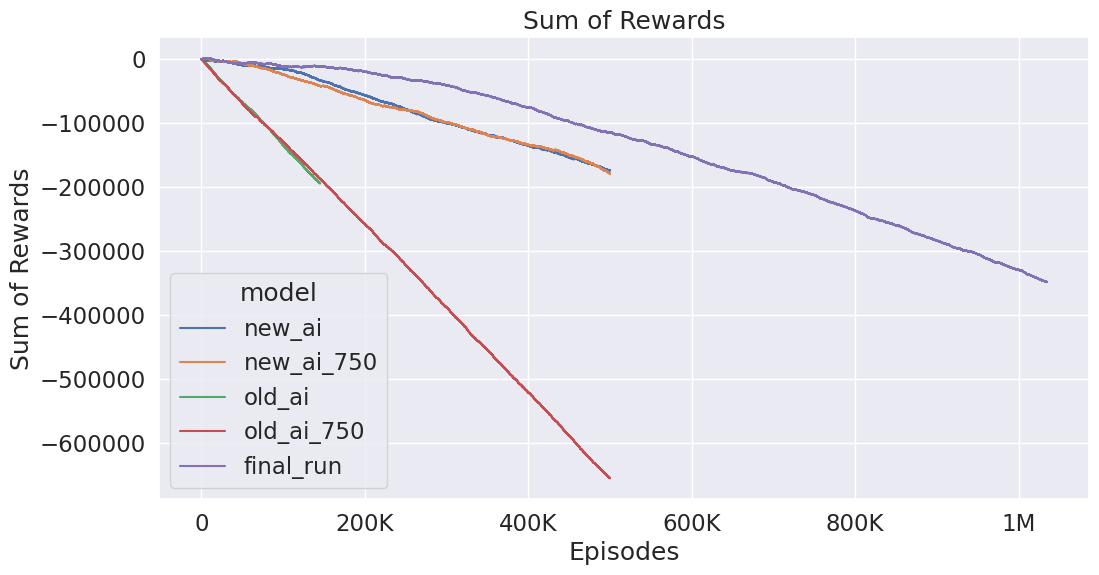

In [9]:
#line plot showing running sum of rewards
plt.figure(figsize=(12, 6))
sns.set(font_scale=1.5)
sns.lineplot(data=df, x='Episode', y='Running Total', hue='model')
plt.title('Sum of Rewards')
plt.xlabel('Episodes')
plt.ylabel('Sum of Rewards')
plt.xticks(ticks=[0, 200000, 400000, 600000, 800000, 1000000], labels=['0', '200K', '400K', '600K', '800K', '1M'])
plt.show()

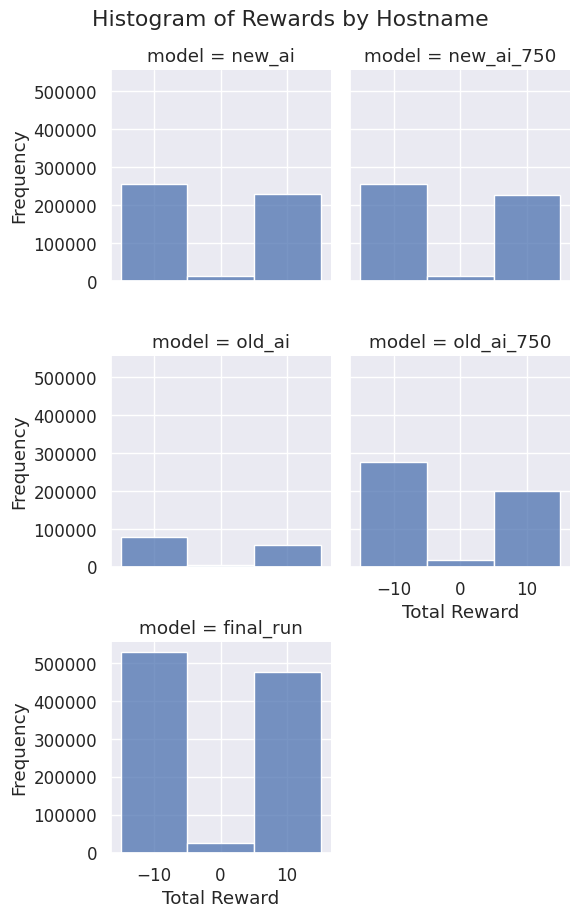

In [7]:
#increase text size
sns.set(font_scale=1.1)
# Create separate histograms for each hostname using Seaborn's FacetGrid
custom_bins = [-15, -5, 5, 15]
g = sns.FacetGrid(df, col='model', col_wrap=2)
g.map(sns.histplot, 'Total Reward', bins=custom_bins)

# Set labels and title
g.set_axis_labels('Total Reward', 'Frequency')
plt.suptitle('Histogram of Rewards by Hostname', y=1.02)

# Show the plot
plt.show()

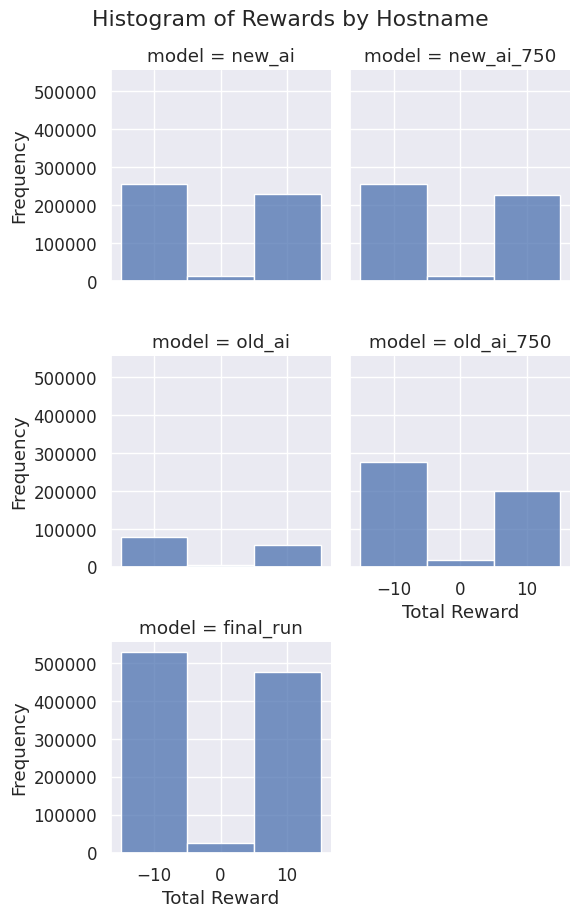

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define custom bins for specific ranges
custom_bins = [-15, -5, 5, 15]  # Define your custom bins here

# Create separate histograms for each hostname using Seaborn's FacetGrid
g = sns.FacetGrid(df, col='model', col_wrap=2)
g.map(sns.histplot, 'Total Reward', bins=custom_bins)

# Set labels and title
g.set_axis_labels('Total Reward', 'Frequency')
plt.suptitle('Histogram of Rewards by Hostname', y=1.02)

# Show the plot
plt.show()